### TÍTULO
"SOBRECARGA DE TRABAJO EN LOS CENTROS DE SERVICIOS SOCIALES EN EL AYUNTAMIENTO DE MADRID"

### TEMA
"VALORAR LA SOBREEXPLOTACION DE LOS TRABAJADORES SOCIALES EN EPOCA POST-COVID"
Los datos a valorar son los del año 2021, que es un año completo.
Sería interesante ver los datos en los años 2019 y 2020 para valorar como ha ido evolucionando en estos años (SI TUVIERA TIEMPO, INTENTARÉ HACER UNA DESCRIPCION) 

### HIPÓTESIS
hipotesis_1 = "HAY MUCHA DEMANDA DE AYUDAS Y SERVICIOS SOCIALES EN DETERMINADOS DISTRITOS (VALORAR SI ES EN TODOS) Y POCO PERSONAL PARA ABSORBER ESTA DEMANDA"
hipotesis_2 = "VALORAR SI HAY SUFICIENTES RECURSOS NO HUMANOS PARA ATENDER LAS DEMANDAS DE LOS USUARIOS"

In [2]:
"""
IMPORTS
"""
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import folium 
from folium import plugins
import ipywidgets
import geocoder
import geopy
import numpy as np
from vega_datasets import data as vds
from branca.element import Figure

In [18]:
"""
PALETAS PARA GRAFICAS
"""
paleta_distrito=['#cc0000','#fc0000','#fc0000','#ff0000','#ff0000','#ff8000','#ff9933','#999900','#336600','#009900','#00ff00','#33ffff','#00cccc','#0080ff','#0000ff','#0000cc','#004c99','#000099','#000099','#000066','#000066']
paleta_centro=['#cc0000','#cc0000','#cc0000','#fc0000','#fc0000','#fc0000','#ff0000','#ff0000','#ff8000','#ff9933','#ff9933','#999900','#999900','#336600','#336600','#00ff00','#00ff00','#33ffff','#33ffff','#00cccc','#00cccc','#0080ff','#0080ff','#0000ff','#0000ff','#0000ff','#0000cc','#0000cc','#0000cc','#004c99','#004c99','#004c99','#000099','#000099','#000066','#000066','#000066']

In [85]:
len(paleta_distrito)

22

LA FUENTE PRINCIPAL DE TODOS LOS DATOS OBTENIDOS HA SIDO A TRAVES DE LAS PAGINAS DEL AYUNTAMIENTO DE MADRID (MUNIMADRID Y PORTAL DE DATOS ABIERTOS DEL AYUNTAMIENTO DE MADRID)

In [ ]:
# guarda en variables los datasets y su fuente
# df_1 = pd.DataFrame()
# URL_indice_vulnerabilidad_rentas="https://datos.madrid.es/sites/v/index.jsp?vgnextoid=bbd71fa5c48a0810VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD""
##  DE ESTE VINCULO (Esfera de Economía y Empleo por Distritos y Barrios) SE EXTRAEN DATOS DE RENTA MEDIA POR HOGAR

#df_2 = pd.DataFrame()
# Servicios Sociales Ayto
## ESTE ES UN FICHERO EXTRAIDO DE DATOS.MADRID, DEL CUAL NO TENGO VINCULO. EN EL SE DETALLA EL NUMERO DE TRABAJADORES POR CENTRO Y DISTRITO

#df_3 = pd.DataFrame()
# URL_personas_atendidas="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=8c936c7fe412b610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
# SE DETALLAN LAS PERSONAS ATENDIDAS

#df_4 = pd.DataFrame()
# URL_citas_proporcionadas="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=73ee23d869578610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
# SE DETALLAN LAS CITAS QUE SE HAN DADO A USUARIOS, RELACIONADA CON EL DF_3

#df_5 = pd.DataFrame()
# URL_demandas_de_servicio="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=40ab4e8b0327d610VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
# SOLICITUDES DE PROCESOS SOLICITADOS POR LOS USUARIOS

#df_6 = pd.DataFrame()
# URL_urgencias_atendidas="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=0b006dace9578610VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
# URGENCIAS ATENDIDAS EN LOS CENTROS. ESTAS URGENCIAS SON DE LA SIGUIENTES TIPOLOGIAS 
# Abandono
# Alojamiento/Vivienda
# Desprotección social problema salud
# Desprotección socio-familiar
# Malos tratos

#df_7 = pd.DataFrame()
# URL: http://www-2.munimadrid.es/CSE6/control/mostrarDatos
## ESTE ES UN FICHERO EXTRAIDO DE MUNIMADRID, EL CUAL ES UN FICHERO DE EXCEL DONDE EXTRAIGO LA POBLACION DE CADA DISTRITO


# OTROS POSIBLES DF QUE PUDIERA NECESITAR:
#URL_datos_abiertos_madrid="https://datos.madrid.es/portal/site/egob/menuitem.9e1e2f6404558187cf35cf3584f1a5a0/?vgnextoid=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
#URL_centros_sociales="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=7c123e08dafc8410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
#URL_ayudas_sociales="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=00937b777f8ea610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
#URL_panel_indicador="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=71359583a773a510VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
#URL_ranking_vulnerabilidad="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=d029ed1e80d38610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"


In [8]:
df_1= pd.read_excel("Archivos\indice_vulnerabilidad_rentas.xlsx",sheet_name="Descriptivos distritos")

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 15 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Codigo distrito                                                             21 non-null     int64  
 1   Nombre distrito                                                             21 non-null     object 
 2   Fecha datos                                                                 21 non-null     int64  
 3   Valor catastral medio (vivienda residencial)                                21 non-null     float64
 4   Valor catastral medio (vivienda residencial) - media ciudad                 21 non-null     float64
 5   Renta neta media por hogar                                                  21 non-null     int64  
 6   Renta neta media por hogar - media ciudad           

In [9]:
df_1.head()

,Codigo distrito,Nombre distrito,Fecha datos,Valor catastral medio (vivienda residencial),Valor catastral medio (vivienda residencial) - media ciudad,Renta neta media por hogar,Renta neta media por hogar - media ciudad,Tasa de población extranjera,Tasa de población extranjera - media ciudad,Tasa de abstención electoral,Tasa de abstención electoral - media ciudad,Porcentaje de mujeres,Porcentaje de mujeres - media ciudad,Porcentaje de población menos de 14 años y mayor de 65 años,Porcentaje de población menos de 14 años y mayor de 65 años - media ciudad
0,1,Centro,2020,116035.12,109659.45,38171,43146.43,26.10,15.54,28.35,26.2,48.94,53.27,22.54,32.93
1,2,Arganzuela,2020,113616.23,109659.45,45262,43146.43,10.61,15.54,21.38,26.2,53.16,53.27,31.38,32.93
2,3,Retiro,2020,171607.82,109659.45,57027,43146.43,8.68,15.54,19.72,26.2,54.57,53.27,37.77,32.93
3,4,Salamanca,2020,191335.86,109659.45,60435,43146.43,15.02,15.54,21.73,26.2,55.71,53.27,34.36,32.93
4,5,Chamartín,2020,191483.01,109659.45,69558,43146.43,10.11,15.54,19.82,26.2,54.90,53.27,36.37,32.93


DE ESTE DATAFRAME, TOMARE LOS DATOS DE "NOMBRE DISTRITO", RENTA MEDIA POR HOGAR. NO HACE FALTA HACER MODIFICACION SOBRE ESTOS DATOS. FALTA CONSEGUIR EL NUMERO DE HABITANTES POR DISTRITO EN ESTE DATAFRAME

In [ ]:
df_1=df_1[["Codigo distrito","Nombre distrito","Renta neta media por hogar"]]
df_1

In [11]:
df_1.to_csv('Archivos\df_1.csv',header=True,index=False)

In [12]:
df_2= pd.read_csv("Archivos\Trabajadores_sociales.csv",sep=';',encoding='iso8859_16')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Distrito                    38 non-null     int64 
 1   Distrito_L                  38 non-null     object
 2   Centro                      38 non-null     int64 
 3   Centro_L                    38 non-null     object
 4   Trabajadores sociales PA    38 non-null     int64 
 5   Trabajadores sociales Zona  38 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.9+ KB


In [13]:
df_2.head()

,Distrito,Distrito_L,Centro,Centro_L,Trabajadores sociales PA,Trabajadores sociales Zona
0,1,Centro,71,CSS Maravillas,2,6
1,1,Centro,70,CSS Puerta de Toledo,3,11
2,2,Arganzuela,69,CSS José Villarreal,2,11
3,3,Retiro,72,CSS Retiro,3,6
4,4,Salamanca,73,CSS Guindalera,3,10


DE ESTE DATAFRAME VAMOS A TOMAR LOS DATOS DE DISTRITO_L, CENTRO Y TRABAJADORES SOCIALES TOTAL (QUE SERA LA SUMA DE LAS DOS ULTIMAS COLUMNAS). SOBRE LOS DATOS DE ESTE DATAFRAME ES LO QUE VOY A VALORAR LOS DIFERENTES PARAMETROS

In [14]:
df_2["Trabajadores Sociales Total"]=df_2["Trabajadores sociales PA"]+df_2["Trabajadores sociales Zona"]

df_2=df_2[["Distrito","Distrito_L","Centro_L","Trabajadores Sociales Total"]]

df_2.rename({"Distrito":'Codigo distrito'}, axis=1,inplace=True)                            ##   REEMPLAZO NOMBRES COLUMNAS PARA UNIFICARLOS CON EL RESTO DE LOS DATAFRAME A UTILIZAR

In [15]:
df_2.rename({"Distrito_L":'Nombre distrito','Centro_L':'Centro'}, axis=1,inplace=True)      ##   REEMPLAZO NOMBRES COLUMNAS PARA UNIFICARLOS CON EL RESTO DE LOS DATAFRAME A UTILIZAR

In [17]:
df_2.to_csv('Archivos\df_2.csv',header=True,index=False)

In [ ]:
df_2

In [20]:
df_3=pd.read_csv("Archivos\personas_atendidas_atencion_primaria_2021.csv",sep=';',encoding='ISO-8859-1',index_col='Secuencia')

df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437386 entries, 1 to 437386
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Código Centro           437386 non-null  int64  
 1   Centro                  437386 non-null  object 
 2   Código Distrito Centro  437386 non-null  int64  
 3   Distrito Centro         437386 non-null  object 
 4   Código Distrito         437386 non-null  int64  
 5   Distrito                437386 non-null  object 
 6   Código Barrio           437386 non-null  object 
 7   Barrio                  437386 non-null  object 
 8   Sección Censal          437367 non-null  float64
 9   Tramo Edad              437386 non-null  object 
 10  Nacionalidad            437386 non-null  object 
 11  Sexo                    437386 non-null  object 
 12  Año Atención            437386 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 46.7+ MB


DE ESTE DATAFRAME TOMARE LOS DATOS DE DISTRITO CENTRO Y CENTRO PARA PODER REFERENCIAR.
AGRUPARE LOS DATOS DE TRAMO DE EDAD, EN TRAMOS DE 2 GRUPOS Y AGRUPANDO A PARTIR DE 65 AÑOS EN ADELANTE PARA EN UN FUTURO DESARROLLAR ESTA PARTE.
TAMBIEN TOMARE OTROS DATOS PARA DETERMINAR CUANTAS PERSONAS SE HAN ATENDIDO EN EL CENTRO EN EL CASO QUE TENGA TIEMPO.
EL UNICO DATO QUE NO ESTA COMPLETO ES EL DE SECCION CENSAL QUE NO ES RELEVANTE.

In [21]:
df_3.head()

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Código Distrito,Distrito,Código Barrio,Barrio,Sección Censal,Tramo Edad,Nacionalidad,Sexo,Año Atención
Secuencia,,,,,,,,,,,,,
1,104,CSS Infante Don Juan,9,MONCLOA-ARAVACA,2,ARGANZUELA,204,LEGAZPI,101.0,80 - 84,Española,H,2.021
2,69,CSS José Villarreal,2,ARGANZUELA,2,ARGANZUELA,202,ACACIAS,15.0,60 - 64,Española,H,2.021
3,69,CSS José Villarreal,2,ARGANZUELA,2,ARGANZUELA,202,ACACIAS,26.0,30 - 34,Española,M,2.021
4,69,CSS José Villarreal,2,ARGANZUELA,2,ARGANZUELA,202,ACACIAS,18.0,65 - 69,Extranjera,H,2.021
5,69,CSS José Villarreal,2,ARGANZUELA,2,ARGANZUELA,202,ACACIAS,26.0,30 - 34,Extranjera,H,2.021


In [22]:
df_3_1=df_3.groupby(['Centro','Distrito Centro','Tramo Edad'], as_index=False)[['Año Atención']].count()                ##  EXTRAIGO LAS COLUMNAS DE CENTRO, DISTRITO CENTRO Y TRAMO DE EDAD, 

df_3_1.rename({'Año Atención':'N_personas_atendidas'}, axis=1,inplace=True)                                             ##  HAGO UN CONTEO DE LAS ACCIONES A PARTIR DEL AÑO DE ATENCION Y LE CAMBIO EL NOMBRE PARA DEFINIRLO

In [23]:
df_3_1.to_csv('Archivos\df_3_1.csv',header=True,index=False)

In [ ]:
df_3_1

ESTA PARTE DEL CODIGO NO SE UTILIZARA EN ESTE MOMENTO, SON OBTENCION DE DATOS PARA UN POSTERIOR ESTUDIO, EN EL CASO QUE SEA POSIBLE SEGUIR

In [ ]:
#df_3_2=df_3.groupby(['Centro','Distrito Centro'], as_index=False)[['Año Atención']].count()                             ##  EXTRAIGO LAS COLUMNAS DE CENTRO, DISTRITO CENTRO, 

#df_3_2.rename({'Año Atención':'N_personas_atendidas'}, axis=1,inplace=True)                                             ##  HAGO UN CONTEO DE LAS ACCIONES A PARTIR DEL AÑO DE ATENCION Y LE CAMBIO EL NOMBRE PARA DEFINIRLO

#df_3_2.to_csv('Archivos\df_3_2.csv',header=True,index=False)                                                            ##  ESTE DATAFRAME FINALMENTE NO LO UTILIZO

In [27]:
df_4=pd.read_csv("Archivos\citas_proporcionada_2021.csv",sep=';',encoding='latin-1',index_col='Secuencia')

df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357873 entries, 1 to 357873
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Código Centro               357873 non-null  int64  
 1   Centro                      357873 non-null  object 
 2   Código Distrito Centro      357873 non-null  object 
 3   Distrito Centro             357873 non-null  object 
 4   Código Distrito             357873 non-null  object 
 5   Distrito                    357873 non-null  object 
 6   Código Barrio               357873 non-null  object 
 7   Barrio                      357873 non-null  object 
 8   Sección Censal              340241 non-null  float64
 9   Tramo Edad                  357873 non-null  object 
 10  Nacionalidad                357873 non-null  object 
 11  Sexo                        357873 non-null  object 
 12  Código Tipo Atención        357873 non-null  int64  
 13  Tipo Atención 

In [30]:
df_4.head()

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Código Distrito,Distrito,Código Barrio,Barrio,Sección Censal,Tramo Edad,...,Código Tipo Atención,Tipo Atención,Es Cita Grupo,Resultado Cita,Código Resultado Cita,Código Forma Celebración,Forma Celebración,Código Forma Petición Cita,Forma Petición Cita,Fecha Cita
Secuencia,,,,,,,,,,,,,,,,,,,,,
1,69,CSS José Villarreal,2,ARGANZUELA,,,,,NaN,,...,2,Zona / Historia Social,N,Cancelado por el profesional,4.0,5,Cancelada,0,Presencial,04/01/2021
2,69,CSS José Villarreal,2,ARGANZUELA,02,ARGANZUELA,0202,ACACIAS,24.0,60 - 64,...,2,Zona / Historia Social,N,Atendido,2.0,1,Telefónica,7,Profesional (Telefónica),04/01/2021
3,69,CSS José Villarreal,2,ARGANZUELA,02,ARGANZUELA,0202,ACACIAS,23.0,45- 49,...,2,Zona / Historia Social,N,Atendido,2.0,1,Telefónica,7,Profesional (Telefónica),04/01/2021
4,69,CSS José Villarreal,2,ARGANZUELA,02,ARGANZUELA,0202,ACACIAS,29.0,45- 49,...,2,Zona / Historia Social,N,Atendido,2.0,6,Correo electrónico,8,Profesional (Correo Electrónico),04/01/2021
5,69,CSS José Villarreal,2,ARGANZUELA,02,ARGANZUELA,0202,ACACIAS,28.0,35 - 39,...,2,Zona / Historia Social,N,Atendido,2.0,3,Colateral,6,Profesional (Coordinación),04/01/2021


TOMARE ESTE DATAFRAME PARA COMPARAR DATOS CON EL DATAFRAME ANTERIOR CON EL OBJETIVO DE VER SI HAY O NO CORRELACION.
DE ESTE DATAFRAME, APARTE DE LOS DE REFERENCIA, TOMARE "RESULTADO CITA" PARA VER SI HA HABIDO CITA O NO. 

In [31]:
df_4_1=df_4.groupby(['Centro','Distrito Centro','Resultado Cita'], as_index=False)[['Fecha Cita']].count()               ##  EXTRAIGO LAS COLUMNAS DE CENTRO, DISTRITO CENTRO, RESULTADO CITA

df_4_1.rename({'Fecha Cita':'N_citas_proporcionadas'}, axis=1,inplace=True)                                              ##  HAGO UN CONTEO DE LAS ACCIONES A PARTIR DE FECHA CITA Y LE CAMBIO EL NOMBRE PARA DEFINIRLO

In [32]:
df_4_1.to_csv('Archivos\df_4_1.csv',header=True,index=False)

In [ ]:
df_4_1                                                                                                              ##      DADA LA GRAN VARIEDAD DE DATOS DISTINTOS EN EL CAMPO DE RESULTADO CITA, DEJO PENDIENTE ESTA PARTE
                                                                                                                    ##      A FALTA DE PODER HACER UNA LIMPIEZA Y ORDENACION DE LOS DATOS MEJOR CON REGEX

In [34]:
df_5=pd.read_csv("Archivos\demandas_de_servicio_2021.csv",sep=';',encoding='ISO-8859-1',index_col='Secuencia')

df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147540 entries, 1 to 147540
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Código Centro           147540 non-null  int64  
 1   Centro                  147540 non-null  object 
 2   Código Distrito Centro  147540 non-null  object 
 3   Distrito Centro         147540 non-null  object 
 4   Código Distrito         147540 non-null  object 
 5   Distrito                147540 non-null  object 
 6   Código Barrio           147540 non-null  object 
 7   Barrio                  147540 non-null  object 
 8   Sección Censal          52604 non-null   float64
 9   Tramo Edad              147540 non-null  object 
 10  Nacionalidad            147540 non-null  object 
 11  Sexo                    147540 non-null  object 
 12  Código Proceso          147540 non-null  int64  
 13  Proceso                 147540 non-null  object 
 14  Fecha Demanda       

In [35]:
df_5.head()

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Código Distrito,Distrito,Código Barrio,Barrio,Sección Censal,Tramo Edad,Nacionalidad,Sexo,Código Proceso,Proceso,Fecha Demanda
Secuencia,,,,,,,,,,,,,,,
1,69,CSS José Villarreal,02,ARGANZUELA,02,ARGANZUELA,0203,CHOPERA,39.0,60 - 64,Española,M,57,DEPENDENCIA CM,04/01/2021
2,69,CSS José Villarreal,02,ARGANZUELA,02,ARGANZUELA,0203,CHOPERA,38.0,>=85,Española,H,57,DEPENDENCIA CM,04/01/2021
3,69,CSS José Villarreal,02,ARGANZUELA,02,ARGANZUELA,0203,CHOPERA,39.0,60 - 64,Española,M,57,DEPENDENCIA CM,04/01/2021
4,69,CSS José Villarreal,02,ARGANZUELA,02,ARGANZUELA,0203,CHOPERA,38.0,>=85,Española,H,168,SERVICIO DE AYUDA A DOMICILIO MAYORES,04/01/2021
5,69,CSS José Villarreal,02,ARGANZUELA,02,ARGANZUELA,0203,CHOPERA,46.0,60 - 64,Española,H,129,PENSION NO CONTRIBUTIVA INVALIDEZ,04/01/2021


ESTE DATAFRAME LO VOY A COMPARAR EN RELACION CON LOS ANTERIORES PARA VER LA RELACION ENTRE AMBOS.
TOMARE LOS DATOS DE REFERENCIA Y TRAMO DE EDAD Y PROCESO Y UN CONTEO PARA UN FUTURO ESTUDIO

In [37]:
df_5.rename({'Fecha Demanda':'N_demandas'}, axis=1,inplace=True)                                        ##  RENOMBRO LA FECHA PARA DEFINIR EL NUMERO DE DEMANDAS QUE SE HACEN

df_5_1=df_5.groupby(['Centro','Distrito Centro','Tramo Edad','Proceso'], as_index=False)[['N_demandas']].count()             ##  EXTRAIGO LAS COLUMNAS DE CENTRO, DISTRITO CENTRO, TRAMO DE EDAD, PROCESO Y HAGO CONTEO DE LAS DEMANDAS SOLICITADAS

In [38]:
df_5_1.to_csv('Archivos\df_5_1.csv',header=True,index=False)

In [ ]:
df_5_1

In [41]:
df_6=pd.read_csv("Archivos\demandas_de_servicio_2021.csv",sep=';',encoding='ISO-8859-1', index_col='Secuencia')

df_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147540 entries, 1 to 147540
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Código Centro           147540 non-null  int64  
 1   Centro                  147540 non-null  object 
 2   Código Distrito Centro  147540 non-null  object 
 3   Distrito Centro         147540 non-null  object 
 4   Código Distrito         147540 non-null  object 
 5   Distrito                147540 non-null  object 
 6   Código Barrio           147540 non-null  object 
 7   Barrio                  147540 non-null  object 
 8   Sección Censal          52604 non-null   float64
 9   Tramo Edad              147540 non-null  object 
 10  Nacionalidad            147540 non-null  object 
 11  Sexo                    147540 non-null  object 
 12  Código Proceso          147540 non-null  int64  
 13  Proceso                 147540 non-null  object 
 14  Fecha Demanda       

In [42]:
df_6.head()

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Código Distrito,Distrito,Código Barrio,Barrio,Sección Censal,Tramo Edad,Nacionalidad,Sexo,Código Proceso,Proceso,Fecha Demanda
Secuencia,,,,,,,,,,,,,,,
1,69,CSS José Villarreal,02,ARGANZUELA,02,ARGANZUELA,0203,CHOPERA,39.0,60 - 64,Española,M,57,DEPENDENCIA CM,04/01/2021
2,69,CSS José Villarreal,02,ARGANZUELA,02,ARGANZUELA,0203,CHOPERA,38.0,>=85,Española,H,57,DEPENDENCIA CM,04/01/2021
3,69,CSS José Villarreal,02,ARGANZUELA,02,ARGANZUELA,0203,CHOPERA,39.0,60 - 64,Española,M,57,DEPENDENCIA CM,04/01/2021
4,69,CSS José Villarreal,02,ARGANZUELA,02,ARGANZUELA,0203,CHOPERA,38.0,>=85,Española,H,168,SERVICIO DE AYUDA A DOMICILIO MAYORES,04/01/2021
5,69,CSS José Villarreal,02,ARGANZUELA,02,ARGANZUELA,0203,CHOPERA,46.0,60 - 64,Española,H,129,PENSION NO CONTRIBUTIVA INVALIDEZ,04/01/2021


DE ESTE DATAFRAME TOMARE LOS DATOS DE REFERENCIA.
APARTE EL TRAMO DE EDAD Y EL PROCESO PARA PODER VALORAR EL TIPO DE SERVICIO SOLICITADO Y PODER DISCRIMINAR EN SU MOMENTO Y HARE UN CONTEO DE FECHA DE DEMANDA
ESTE DATAFRAME NO ME DA NINGUN DATO RELEVANTE, LO DEJO APARTADO

In [43]:
df_6=df_6.groupby(['Centro','Distrito Centro','Tramo Edad','Proceso'], as_index=False)[['Fecha Demanda']].count()       ##  EXTRAIGO LAS COLUMNAS DE CENTRO, DISTRITO CENTRO, TRAMO DE EDAD Y PROCESO Y HAGO CONTEO DE LAS FECHA DE DEMANDA

In [45]:
# direccion de donde se obtienen los datos en excel: url_poblacion: "http://www-2.munimadrid.es/CSE6/control/mostrarDatos"

df_7= pd.read_excel ("Archivos\datos_poblacion_distrito_2021.xls",header=5,skiprows=2,nrows=21)

df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0        Ciudad de Madrid  21 non-null     object 
 1   3.312.310              21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 464.0+ bytes


In [46]:
df_7.head()

,Ciudad de Madrid,3.312.310
0,01. Centro,141.236
1,02. Arganzuela,154.243
2,03. Retiro,118.557
3,04. Salamanca,146.016
4,05. Chamartín,145.700


In [47]:
df_7.rename({'     Ciudad de Madrid':'Poblacion','3.312.310':'Habitantes'}, axis=1,inplace=True)                ##  REEMPLAZO EL HEADER DEL DATAFRAME PARA PODER USARLO POSTERIORMENTE CON LOS ANTERIORES

df_7['Poblacion']=df_7.Poblacion.str.split(".").str.get(1)

In [48]:
df_7.to_csv('Archivos\df_7.csv',header=True,index=False)

In [ ]:
df_7

TRAS HABER SALVADO LOS DATOS RELEVANTES DE LAS TABLAS EN FICHEROS .CSV VAMOS A PROCEDER A TRABAJAR A PARTIR DE AQUI CON ELLOS PARA LO QUE LOS VAMOS A IMPORTAR DE NUEVO AL FICHERO Y EMPEZAR A AGRUPAR CON 'MERGE' Y DESARROLLAR LAS GRAFICAS OPORTUNAS.

In [225]:
df_1= pd.read_csv('Archivos\df_1.csv')
df_2= pd.read_csv('Archivos\df_2.csv')
#df_7= pd.read_csv('Archivos\df_7.csv')                                                             ## ESTE DATAFRAME FINALMENTE NO LO UTILIZO DADO QUE TUVE PROBLEMAS PARA HACER MERGE CON LOS OTROS DOS, PORQUE NO RECONOCIA RELACION


In [226]:
df_2_1=df_2.groupby('Nombre distrito')['Centro'].count()                    ##  EXTRAIGO EL NUMERO DE CENTROS SOCIALES POR DISTRITO PARA ANOTARLO POSTERIORMENTE EN LA GRAFICA

In [227]:
df_2_1=df_2[['Codigo distrito','Nombre distrito','Centro']].groupby('Codigo distrito')['Centro'].count()

In [228]:
df_1=df_1.sort_values(by='Renta neta media por hogar',ascending=True)                       ## ORDENO DE MENOR A MAYOR LOS DISTINTOS DISTRITOS EN FUNCION DE LA RENTA MEDIA DE CADA HOGAR

In [229]:
df_2=df_2[['Codigo distrito','Nombre distrito','Trabajadores Sociales Total']].groupby('Codigo distrito').sum('Trabajadores Sociales Total').reset_index()
##                  DETERMINO EL NUMERO DE TRABAJADORES POR CODIGO DE DISTRITO QUE HAY

In [230]:
Grafico_1_1=pd.merge(df_1,df_2)  

In [ ]:
#df_7.rename({'Poblacion':'Nombre distrito'}, axis=1,inplace=True)

#pd.merge(df_1,df_7,on='Nombre distrito')

#prueba=pd.merge(df_2,df_7,how="outer")                                                     ##      AL INTENTAR HACER UN MERGE-INNER NO SALIA NINGUN DATO, AL HACER OUTER, NO SE RELACIONABAN ENTRE SI

In [231]:
Grafico_1_1

,Codigo distrito,Nombre distrito,Renta neta media por hogar,Trabajadores Sociales Total
0,13,Puente de Vallecas,27975,43
1,12,Usera,29061,30
2,17,Villaverde,29873,25
3,11,Carabanchel,31190,38
4,10,Latina,33237,36
5,18,Villa de Vallecas,34168,8
6,19,Vicálvaro,35510,15
7,14,Moratalaz,37951,12
8,1,Centro,38171,22
9,20,San Blas - Canillejas,38560,23


GRAFICA 1

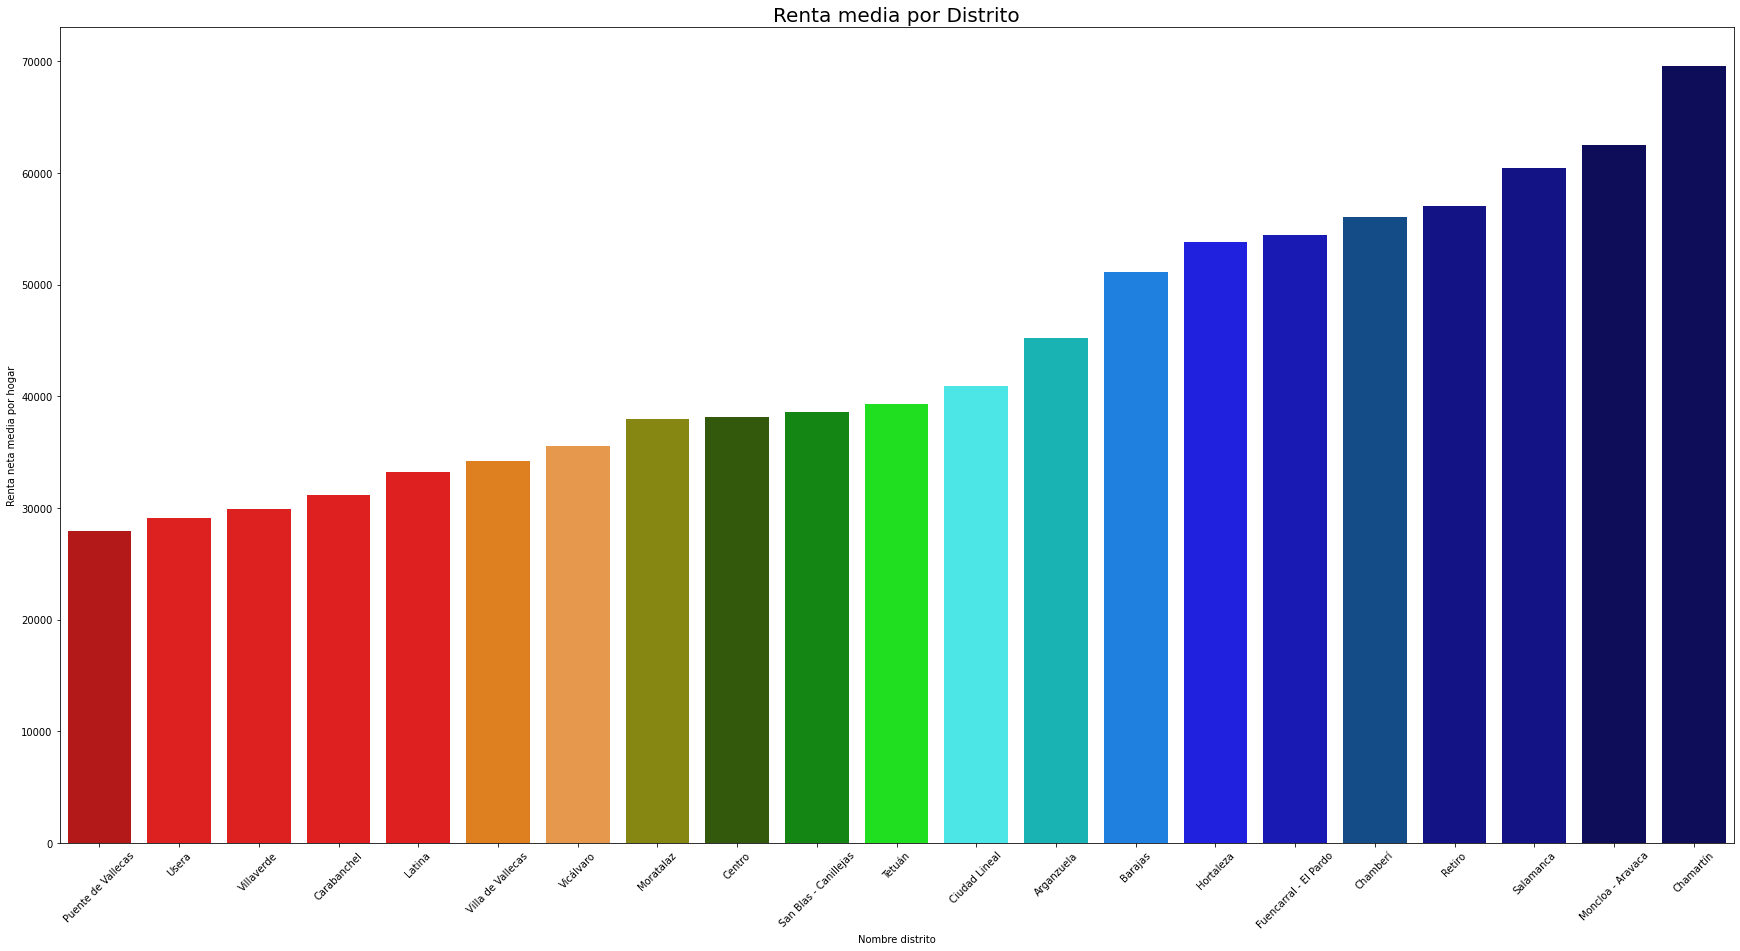

In [17]:
plt.figure(figsize=(30,15))
sns.barplot(x=Grafico_1_1['Nombre distrito'],
                y=Grafico_1_1['Renta neta media por hogar']
                ,palette=paleta_distrito)
plt.xticks(rotation=45, fontsize=10)
plt.title('Renta media por Distrito',fontsize=20);

VALORANDO OTRAS POSIBLES GRAFICAS PARA PRESENTAR LOS DATOS

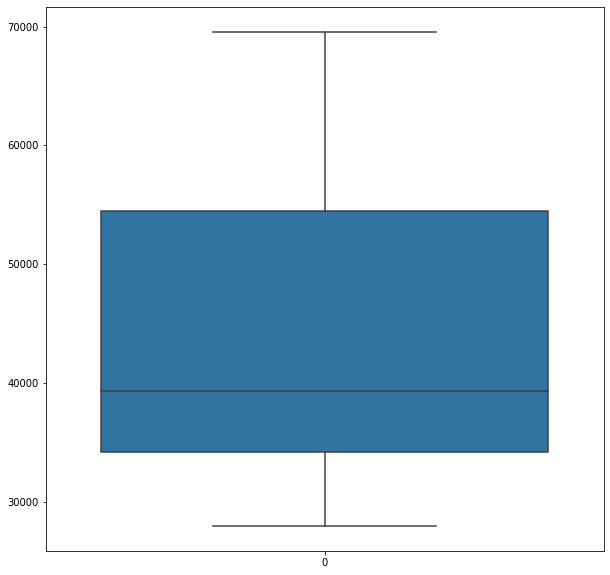

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(data=Grafico_1_1['Renta neta media por hogar']);

In [11]:
Grafico_1_1

,Codigo distrito,Nombre distrito,Renta neta media por hogar,Trabajadores Sociales Total
0,13,Puente de Vallecas,27975,43
1,12,Usera,29061,30
2,17,Villaverde,29873,25
3,11,Carabanchel,31190,38
4,10,Latina,33237,36
5,18,Villa de Vallecas,34168,8
6,19,Vicálvaro,35510,15
7,14,Moratalaz,37951,12
8,1,Centro,38171,22
9,20,San Blas - Canillejas,38560,23


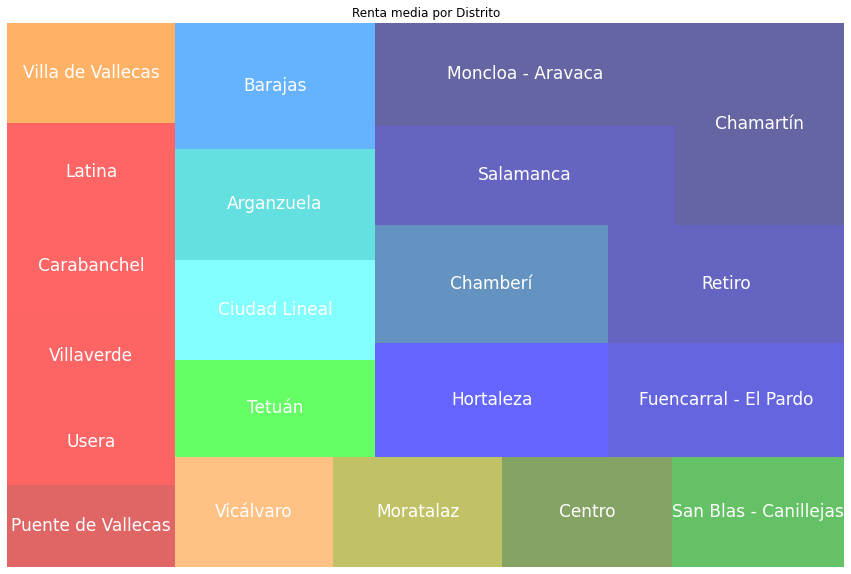

In [247]:
plt.figure(figsize=(15,10))
squarify.plot(sizes=Grafico_1_1['Renta neta media por hogar'], label=Grafico_1_1['Nombre distrito'], alpha=.6,color=paleta_distrito,text_kwargs={'fontsize': 17,'color':'w'})
plt.axis('off')
plt.title('Renta media por Distrito');
#text_kwargs={'fontsize': 18})
#linewidths=.5,

TRAS HABER REALIZADO PRIMERO LA GRAFICA EN BARPLOT, NOS DECIDIMOS POSTERIORMENTE A UN TREEMAP DE COLORES DONDE LAS RENTAS MAS BAJAS ESTAN EN ROJO Y LAS MAS ALTAS EN AZUL

GRAFICA 2

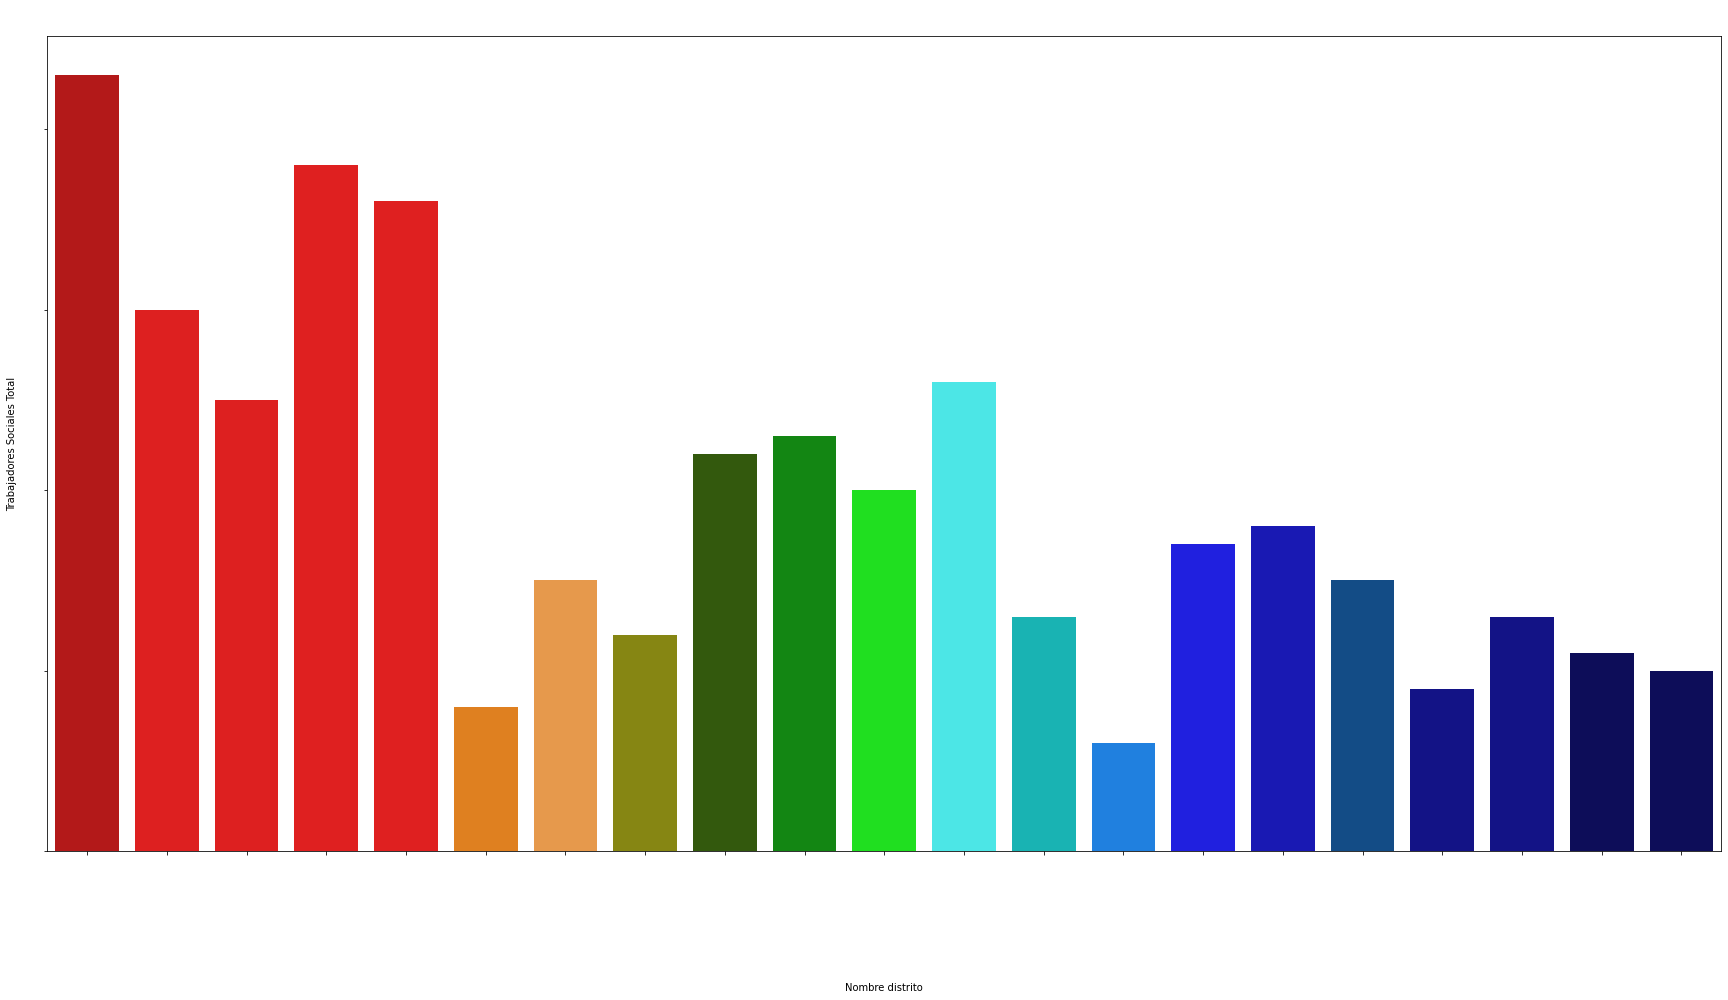

In [235]:
plt.figure(figsize=(30,15))
sns.barplot(x=Grafico_1_1['Nombre distrito'],
                y=Grafico_1_1['Trabajadores Sociales Total'],
                palette=paleta_distrito )
plt.yticks(fontsize=15,color='w')
plt.xticks(rotation=45, fontsize=15,color='w')
plt.title('Numero de Trabajadores Sociales por Distrito',fontsize=30,color='w');

In [4]:
df_2= pd.read_csv('Archivos\df_2.csv')

df_3= pd.read_csv('Archivos\df_3_2.csv')

df_4= pd.read_csv('Archivos\df_4_2.csv')

df_5= pd.read_csv('Archivos\df_5_2.csv')

In [5]:
df_3=df_3.sort_values(by='N_personas_atendidas',ascending=False)         

In [6]:
Grafico_2=pd.merge(df_3,df_4,how="inner")

In [7]:
Grafico_2_2=pd.merge(Grafico_2,df_5,how="inner")

In [8]:
Grafico_2_1=pd.merge(df_2,Grafico_2_2,how="inner").sort_values(by='N_personas_atendidas',ascending=False)               ## ORDENO POR EL NUMERO DE PERSONAS ATENDIDAS

In [9]:
Grafico_2_1['N_personas_atendidas']=round(Grafico_2_1['N_personas_atendidas']/220,2)                            # RECALCULO LAS VARIABLES QUE ESTAN POR AÑO A DIA TRABAJADO QUE ES 220 DIAS LABORALES

Grafico_2_1['N_citas_proporcionadas']=round(Grafico_2_1['N_citas_proporcionadas']/220,2)                        # SEGUN DATOS EXTRAIDOS Y LO REDONDEO A 2 DECIMALES

Grafico_2_1['N_demandas']=round(Grafico_2_1['N_demandas']/220,2)

Grafico_2_1=Grafico_2_1[['Nombre distrito','Centro','Trabajadores Sociales Total','N_personas_atendidas','N_citas_proporcionadas','N_demandas']]

In [10]:
Grafico_2_1

,Nombre distrito,Centro,Trabajadores Sociales Total,N_personas_atendidas,N_citas_proporcionadas,N_demandas
25,Ciudad Lineal,CSS Luis Vives,20,101.26,70.99,30.80
17,Carabanchel,CSS Zaida,18,91.61,72.80,22.39
19,Usera,CSS San Filiberto,18,85.88,60.10,25.68
29,Villaverde,CSS Huerta de Villaverde,15,82.20,45.74,32.28
13,Latina,CSS Fuerte de Navidad,13,70.19,74.10,5.26
30,Villaverde,CSS Eduardo Minguito,10,69.27,52.62,49.92
24,Moratalaz,CSS Fuente Carrantona,12,66.83,35.69,17.33
31,Villa de Vallecas,CSS Villa de Vallecas,8,66.24,44.80,27.86
23,Puente de Vallecas,CSS San Diego,12,65.82,53.91,2.47
15,Latina,CSS Gallur,12,65.24,68.15,14.54


GRAFICA 3

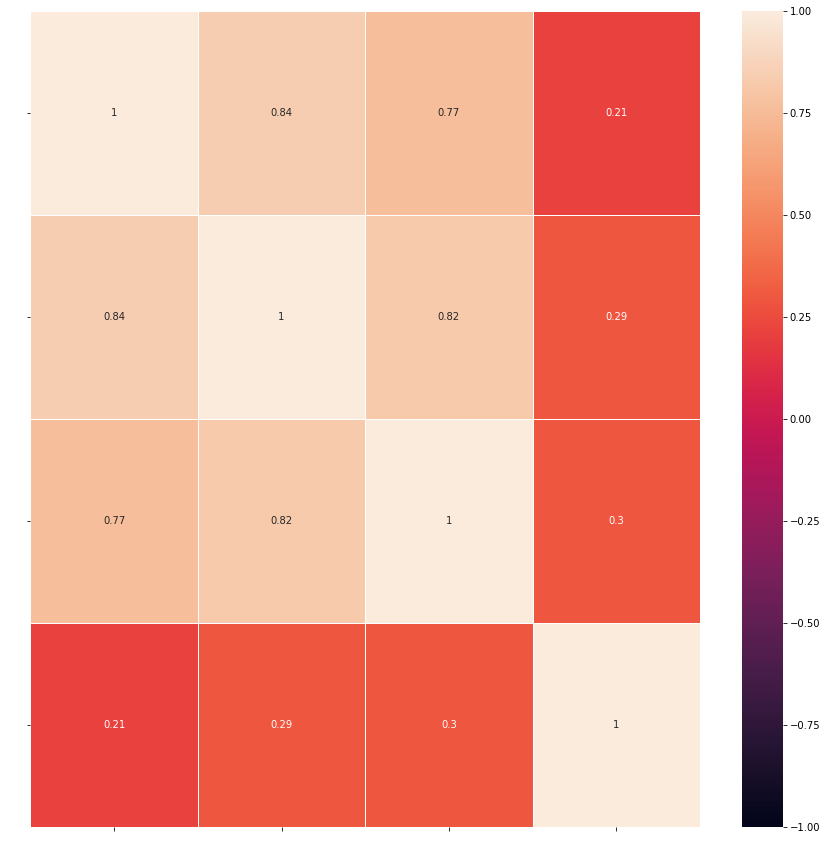

In [10]:
plt.figure(figsize=(15,15))

sns.heatmap(Grafico_2_1.corr(),
            annot=True,
            linewidths=.5,
            vmin=-1,
            vmax=1)

plt.yticks(fontsize=15,color='w')

plt.xticks(fontsize=15,color='w');

#plt.title('Numero de Trabajadores Sociales por Distrito',fontsize=30,color='w');;

SE OBSERVA QUE HAY CORRELACION ENTRE LAS CITAS PROPORCIONADAS, LAS CITAS ATENDIDAS Y EL NUMERO DE TRABAJADORES, NO ASI ENTRE LAS DEMANDAS DE SERVICIOS REALIZADAS CON CUALQUIER OTRO TIPO DE DATO

GRAFICA 4

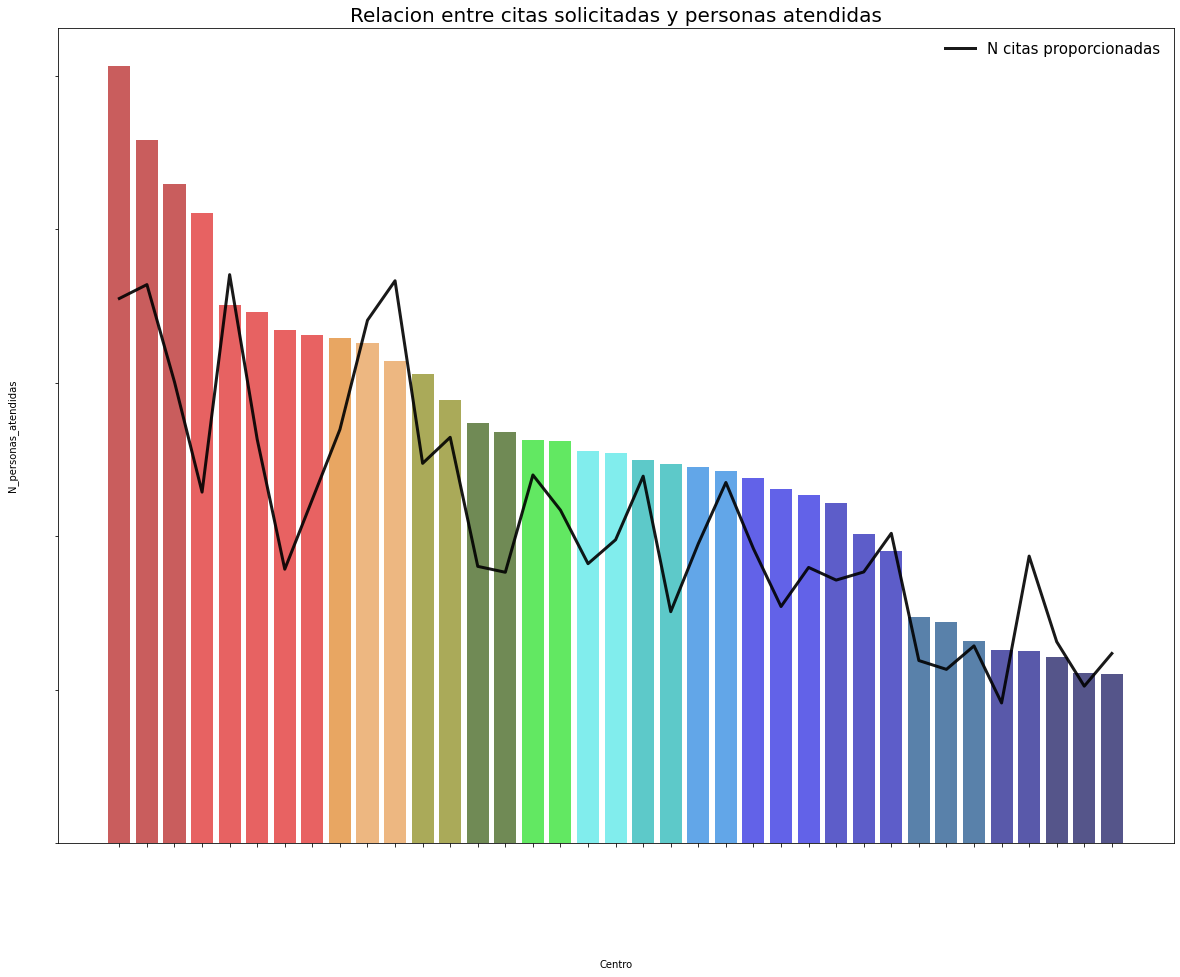

In [11]:
plt.figure(figsize=(20,15))

sns.barplot(x="Centro",
            y="N_personas_atendidas",
            palette=paleta_centro,
            data=Grafico_2_1,
            alpha=0.7,
           ci=None)

sns.lineplot(x='Centro', y="N_citas_proporcionadas", data=Grafico_2_1, color='k', alpha=0.9,linewidth=3,
            label="N citas proporcionadas",markers=True)

plt.title("Relacion entre citas solicitadas y personas atendidas",fontsize=20);

plt.xticks(rotation=45, fontsize=10,ha="right",color='w')

plt.legend(loc=1,frameon=False,fontsize=15)

plt.yticks(fontsize=15,color='w');

NO SE OBSERVA UNA GRAN CORRELACION ENTRE AMBOS DATOS, HAY MUCHAS DIFERENCIAS DE COMPORTAMIENTO

GRAFICA 5

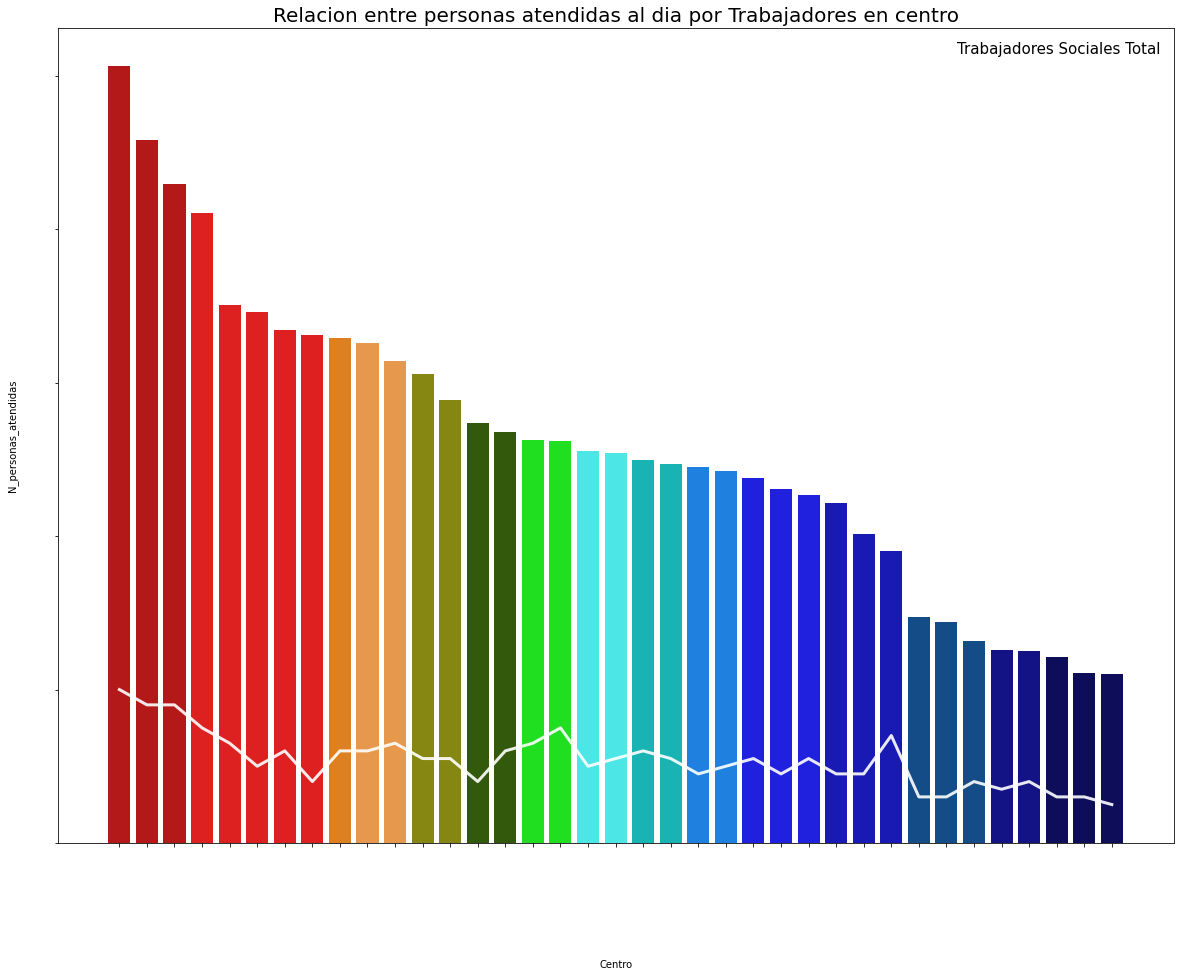

In [12]:
plt.figure(figsize=(20,15))

#plt.figure(figsize=(20,8))
sns.barplot(x="Centro",
            y="N_personas_atendidas",
            palette=paleta_centro,
            data=Grafico_2_1,
           ci=None)

sns.lineplot(x='Centro', y="Trabajadores Sociales Total", data=Grafico_2_1, color='w', alpha=0.9,linewidth=3,
           label="Trabajadores Sociales Total",markers=True)

plt.title("Relacion entre personas atendidas al dia por Trabajadores en centro",fontsize=20)

plt.xticks(rotation=45, fontsize=10,ha="right",color='w')

plt.legend(loc=1,frameon=False,fontsize=15)

plt.yticks(fontsize=15,color='w');

SE OBSERVA UNA CIERTA CORRELACION ENTRE LOS DATOS DE PERSONAL Y USUARIOS ATENDIDOS

OTRAS POSIBLES GRAFICAS PARA REPRESENTAR ESTOS DATOS

<Figure size 21600x28800 with 0 Axes>

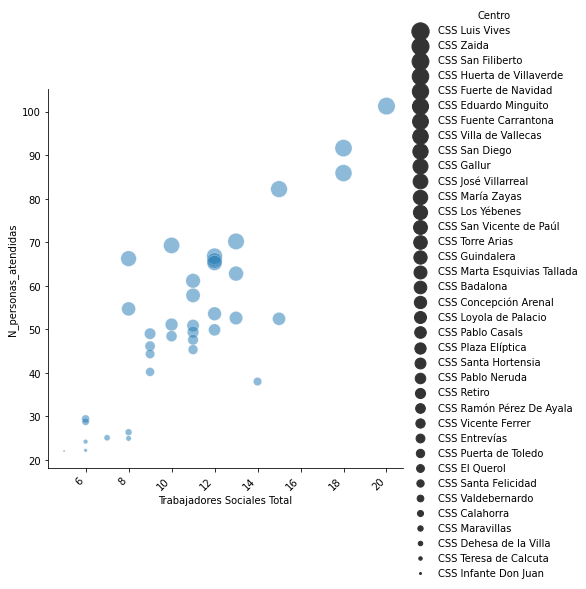

In [33]:
plt.figure(figsize=(300,400))


sns.relplot(data=Grafico_2_1,
            x="Trabajadores Sociales Total",
            y="N_personas_atendidas",
            size="Centro",
            #size="age",
            sizes=(4, 300),
            alpha=.5, palette="muted",
            height=6);

plt.xticks(rotation=45, fontsize=10,ha="right");

In [11]:
Grafico_2_1['Citas_atendidas_por_trabajador']=Grafico_2_1['N_personas_atendidas']/Grafico_2_1['Trabajadores Sociales Total']

Grafico_2_1['Citas_proporcionadas_por_trabajador']=Grafico_2_1['N_citas_proporcionadas']/Grafico_2_1['Trabajadores Sociales Total']

Grafico_2_1=Grafico_2_1[['Nombre distrito','Centro','Trabajadores Sociales Total','N_personas_atendidas','N_citas_proporcionadas','N_demandas']]

Grafico_2_1

,Nombre distrito,Centro,Trabajadores Sociales Total,N_personas_atendidas,N_citas_proporcionadas,N_demandas
25,Ciudad Lineal,CSS Luis Vives,20,101.26,70.99,30.80
17,Carabanchel,CSS Zaida,18,91.61,72.80,22.39
19,Usera,CSS San Filiberto,18,85.88,60.10,25.68
29,Villaverde,CSS Huerta de Villaverde,15,82.20,45.74,32.28
13,Latina,CSS Fuerte de Navidad,13,70.19,74.10,5.26
30,Villaverde,CSS Eduardo Minguito,10,69.27,52.62,49.92
24,Moratalaz,CSS Fuente Carrantona,12,66.83,35.69,17.33
31,Villa de Vallecas,CSS Villa de Vallecas,8,66.24,44.80,27.86
23,Puente de Vallecas,CSS San Diego,12,65.82,53.91,2.47
15,Latina,CSS Gallur,12,65.24,68.15,14.54


In [15]:
plt.figure(figsize=(20,15))

sns.lineplot(x='Centro', y=("N_personas_atendidas"/"Trabajadores Sociales Total"), data=Grafico_2_1, color='w', alpha=0.9,linewidth=3,
           label="Trabajadores Sociales Total",markers=True)

plt.title("Relacion entre personas atendidas al dia por Trabajadores en centro",fontsize=20)

plt.xticks(rotation=45, fontsize=10,ha="right",color='w')

plt.legend(loc=1,frameon=False,fontsize=15)

plt.yticks(fontsize=15,color='w');

TypeError: unsupported operand type(s) for /: 'str' and 'str'

<Figure size 1440x1080 with 0 Axes>

GRAFICA 6

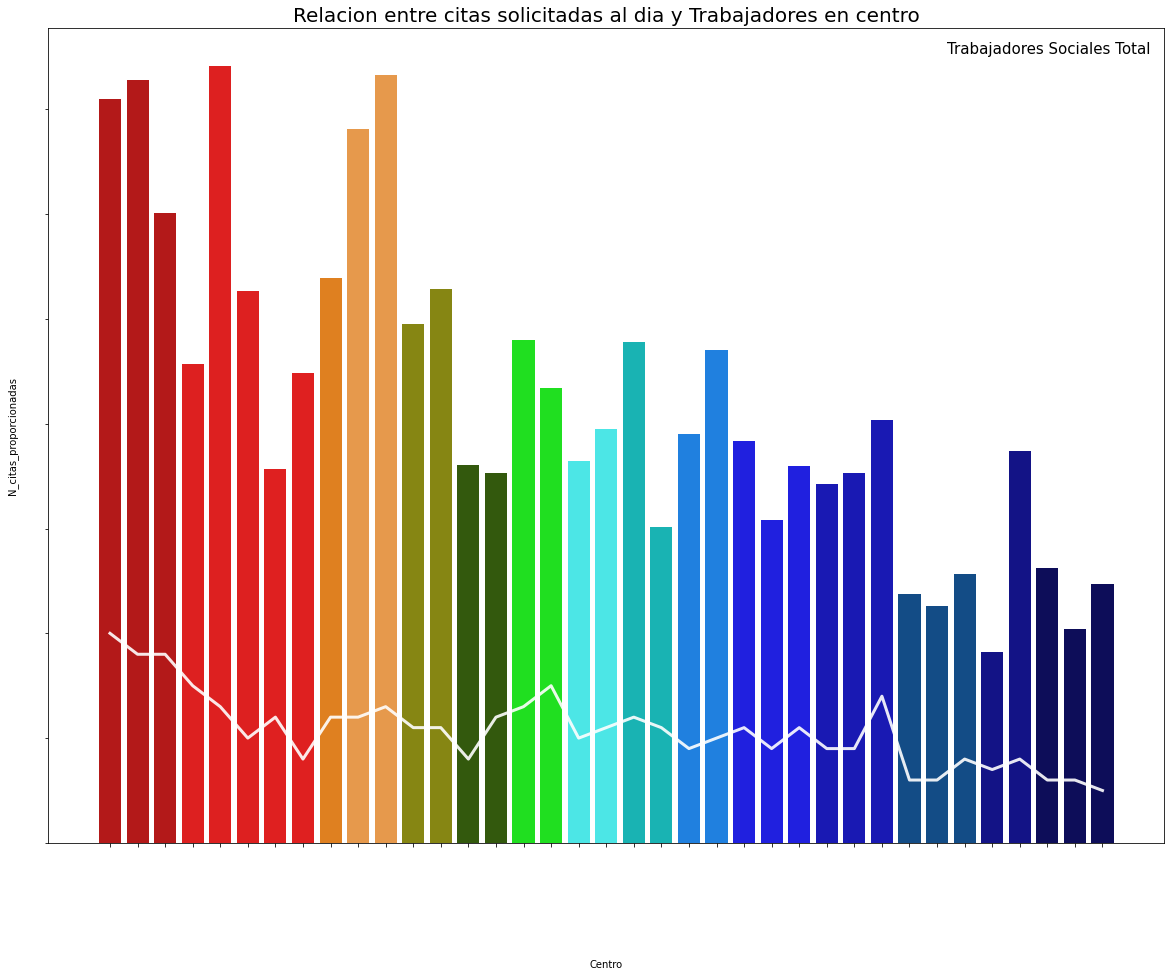

In [16]:
plt.figure(figsize=(20,15))

sns.barplot(x="Centro",
            y="N_citas_proporcionadas",
            palette=paleta_centro,
            data=Grafico_2_1,
           ci=None)

sns.lineplot(x='Centro', y="Trabajadores Sociales Total", data=Grafico_2_1, color='w', alpha=0.9,
            linewidth=3,
           label="Trabajadores Sociales Total",markers=True)

plt.title("Relacion entre citas solicitadas al dia y Trabajadores en centro",fontsize=20);

plt.xticks(rotation=45, fontsize=10,ha="right",color='w')

plt.legend(loc=1,frameon=False,fontsize=15)

plt.yticks(fontsize=15,color='w');

SE OBSERVA UNA CIERTA CORRELACION ENTRE LOS DATOS DE PERSONAL Y CITAS PROPORCIONADAS

OTRAS POSIBLES GRAFICAS PARA REPRESENTAR ESTOS DATOS

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


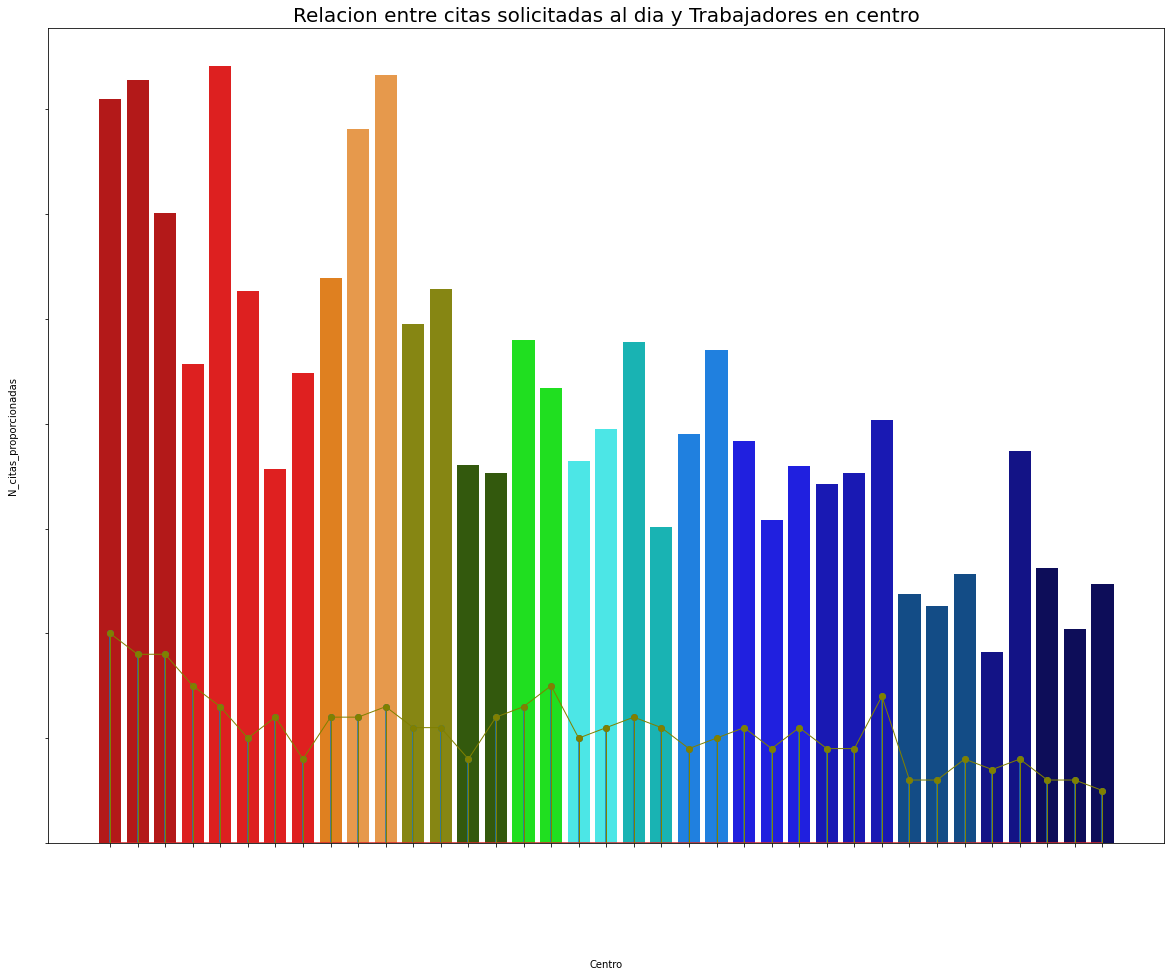

In [17]:
plt.figure(figsize=(20,15))

sns.barplot(x="Centro",
            y="N_citas_proporcionadas",
            palette=paleta_centro,
            data=Grafico_2_1,
           ci=None)

plt.stem(Grafico_2_1["Centro"],Grafico_2_1['Trabajadores Sociales Total'])

(stemlines) = plt.stem(Grafico_2_1['Trabajadores Sociales Total'])

plt.setp(stemlines, linestyle="-", color="olive", linewidth=1 )

plt.title("Relacion entre citas solicitadas al dia y Trabajadores en centro",fontsize=20);

plt.xticks(rotation=45, fontsize=10,ha="right",color='w')

plt.legend(loc=1,frameon=False,fontsize=15)

plt.yticks(fontsize=15,color='w');

In [12]:
Grafico_2_1['Citas_atendidas_por_trabajador']=round(Grafico_2_1['N_personas_atendidas']/Grafico_2_1['Trabajadores Sociales Total'],2)

Grafico_2_1['Citas_proporcionadas_por_trabajador']=round(Grafico_2_1['N_citas_proporcionadas']/Grafico_2_1['Trabajadores Sociales Total'],2)

Grafico_2_1=Grafico_2_1[['Nombre distrito','Centro','Trabajadores Sociales Total','N_personas_atendidas','N_citas_proporcionadas','N_demandas','Citas_atendidas_por_trabajador','Citas_proporcionadas_por_trabajador']]

Grafico_2_1

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Nombre distrito,Centro,Trabajadores Sociales Total,N_personas_atendidas,N_citas_proporcionadas,N_demandas,Citas_atendidas_por_trabajador,Citas_proporcionadas_por_trabajador
25,Ciudad Lineal,CSS Luis Vives,20,101.26,70.99,30.80,5.06,3.55
17,Carabanchel,CSS Zaida,18,91.61,72.80,22.39,5.09,4.04
19,Usera,CSS San Filiberto,18,85.88,60.10,25.68,4.77,3.34
29,Villaverde,CSS Huerta de Villaverde,15,82.20,45.74,32.28,5.48,3.05
13,Latina,CSS Fuerte de Navidad,13,70.19,74.10,5.26,5.40,5.70
30,Villaverde,CSS Eduardo Minguito,10,69.27,52.62,49.92,6.93,5.26
24,Moratalaz,CSS Fuente Carrantona,12,66.83,35.69,17.33,5.57,2.97
31,Villa de Vallecas,CSS Villa de Vallecas,8,66.24,44.80,27.86,8.28,5.60
23,Puente de Vallecas,CSS San Diego,12,65.82,53.91,2.47,5.48,4.49
15,Latina,CSS Gallur,12,65.24,68.15,14.54,5.44,5.68


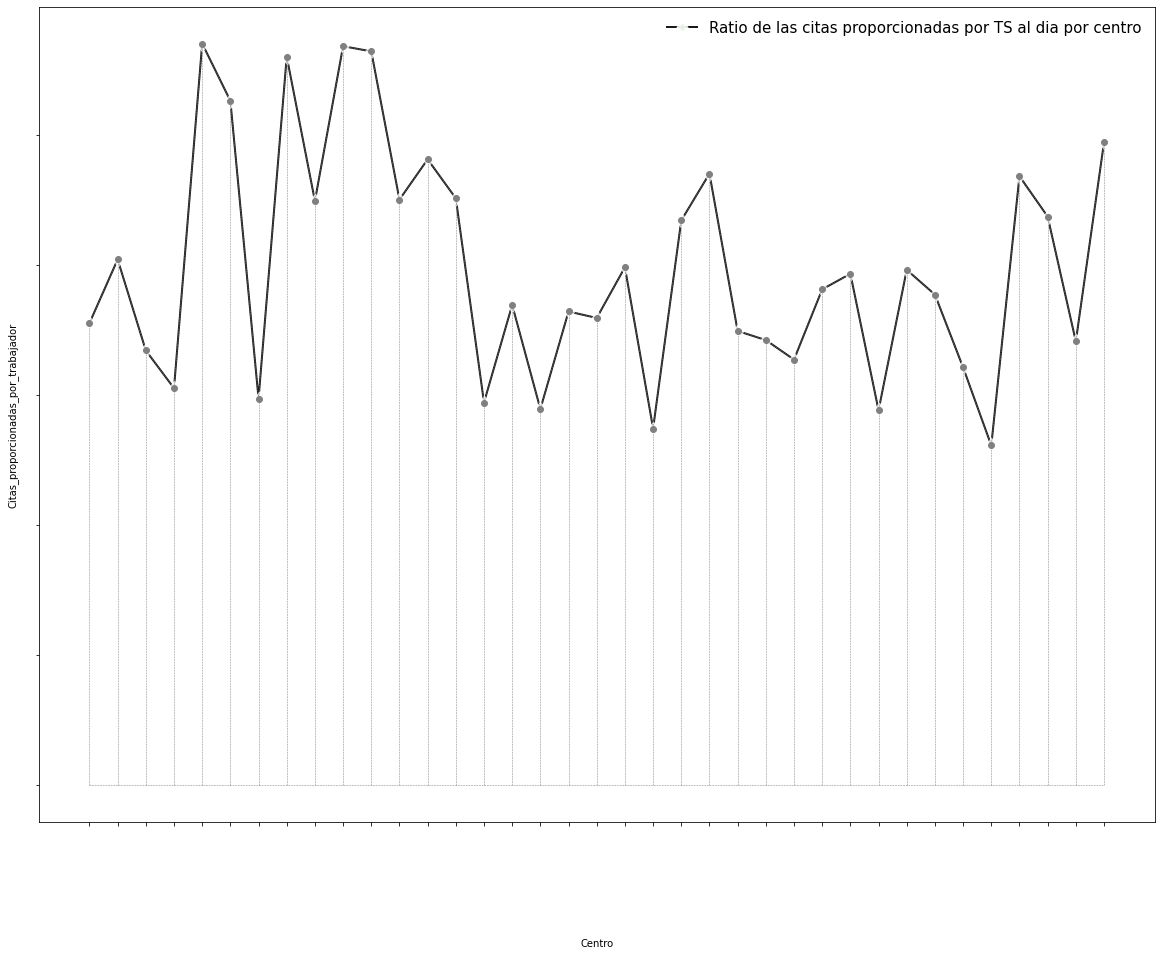

In [19]:
plt.figure(figsize=(20,15))

sns.lineplot(x='Centro', y="Citas_proporcionadas_por_trabajador", data=Grafico_2_1, color='black', alpha=0.9,
            linewidth=2,marker='d',mfc='green',mew='5',
            label="Ratio de las citas proporcionadas por TS al dia por centro")

(stemlines) = plt.stem(Grafico_2_1["Citas_proporcionadas_por_trabajador"])

plt.setp(stemlines, linestyle="--", color="grey", linewidth=0.5)

plt.xticks(rotation=45, fontsize=10,ha="right",color='w')

plt.legend(loc=1,frameon=False,fontsize=15)

plt.yticks(fontsize=15,color='w');

VAMOS A HACER UN MAPA CON LOS DISTINTOS CENTROS SOCIALES EXISTENTES EN LA CIUDAD DE MADRID DONDE AGREGAREMOS LA INFORMACIÓN DE LAS TABLAS ANTERIORES

In [13]:
df_8= pd.read_csv('Archivos\df_8.csv')                                                      ## LOS DATOS QUE APARECEN AQUI ESTAN TOMADOS DIRECTAMENTE DE GOOGLE MAPS Y ANOTANDOLOS EN UN FICHERO

In [14]:
Grafico_2_1

,Nombre distrito,Centro,Trabajadores Sociales Total,N_personas_atendidas,N_citas_proporcionadas,N_demandas,Citas_atendidas_por_trabajador,Citas_proporcionadas_por_trabajador
25,Ciudad Lineal,CSS Luis Vives,20,101.26,70.99,30.80,5.06,3.55
17,Carabanchel,CSS Zaida,18,91.61,72.80,22.39,5.09,4.04
19,Usera,CSS San Filiberto,18,85.88,60.10,25.68,4.77,3.34
29,Villaverde,CSS Huerta de Villaverde,15,82.20,45.74,32.28,5.48,3.05
13,Latina,CSS Fuerte de Navidad,13,70.19,74.10,5.26,5.40,5.70
30,Villaverde,CSS Eduardo Minguito,10,69.27,52.62,49.92,6.93,5.26
24,Moratalaz,CSS Fuente Carrantona,12,66.83,35.69,17.33,5.57,2.97
31,Villa de Vallecas,CSS Villa de Vallecas,8,66.24,44.80,27.86,8.28,5.60
23,Puente de Vallecas,CSS San Diego,12,65.82,53.91,2.47,5.48,4.49
15,Latina,CSS Gallur,12,65.24,68.15,14.54,5.44,5.68


In [15]:
mapa_css=pd.merge(Grafico_2_1,df_8)  

In [16]:
mapa_css

,Nombre distrito,Centro,Trabajadores Sociales Total,N_personas_atendidas,N_citas_proporcionadas,N_demandas,Citas_atendidas_por_trabajador,Citas_proporcionadas_por_trabajador,Codigo distrito,lat,lon
0,Ciudad Lineal,CSS Luis Vives,20,101.26,70.99,30.80,5.06,3.55,15,40.425017,-3.628440
1,Carabanchel,CSS Zaida,18,91.61,72.80,22.39,5.09,4.04,11,40.393442,-3.736259
2,Usera,CSS San Filiberto,18,85.88,60.10,25.68,4.77,3.34,12,40.386020,-3.715218
3,Villaverde,CSS Huerta de Villaverde,15,82.20,45.74,32.28,5.48,3.05,17,40.348595,-3.711033
4,Latina,CSS Fuerte de Navidad,13,70.19,74.10,5.26,5.40,5.70,10,40.380625,-3.765628
5,Villaverde,CSS Eduardo Minguito,10,69.27,52.62,49.92,6.93,5.26,17,40.348248,-3.686532
6,Moratalaz,CSS Fuente Carrantona,12,66.83,35.69,17.33,5.57,2.97,14,40.399828,-3.636298
7,Villa de Vallecas,CSS Villa de Vallecas,8,66.24,44.80,27.86,8.28,5.60,18,40.377442,-3.623138
8,Puente de Vallecas,CSS San Diego,12,65.82,53.91,2.47,5.48,4.49,13,40.388877,-3.663756
9,Latina,CSS Gallur,12,65.24,68.15,14.54,5.44,5.68,10,40.397410,-3.741546


In [19]:
mapa_css.insert(0,"Color",paleta_centro,True)                                           ##AGREGAMOS LA PALETA DE COLORES POR CENTRO PARA TENER UN GRAFICO DONDE SE MARQUEN ESTA REFERENCIA

print(mapa_css)

      Color      Nombre distrito                       Centro  \
0   #cc0000        Ciudad Lineal               CSS Luis Vives   
1   #cc0000          Carabanchel                    CSS Zaida   
2   #cc0000                Usera            CSS San Filiberto   
3   #fc0000           Villaverde     CSS Huerta de Villaverde   
4   #fc0000               Latina        CSS Fuerte de Navidad   
5   #fc0000           Villaverde         CSS Eduardo Minguito   
6   #ff0000            Moratalaz        CSS Fuente Carrantona   
7   #ff0000    Villa de Vallecas        CSS Villa de Vallecas   
8   #ff8000   Puente de Vallecas                CSS San Diego   
9   #ff9933               Latina                   CSS Gallur   
10  #ff9933           Arganzuela          CSS José Villarreal   
11  #999900               Tetuan              CSS María Zayas   
12  #999900               Latina              CSS Los Yébenes   
13  #336600  Fuencarral-El pardo      CSS San Vicente de Paúl   
14  #336600  San Blas-Can

In [20]:
mapa_css=mapa_css.applymap(str)                 ##  VAMOS A PASAR TODOS LOS DATOS A STRING PARA PODER HACER QUE APAREZCAN EN EL MAPA

mapa_css.info()                                 ##  VERIFICAMOS QUE SE HAN CONVERTIDO TODOS LOS INT Y FLOAT A STR

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Color                                37 non-null     object
 1   Nombre distrito                      37 non-null     object
 2   Centro                               37 non-null     object
 3   Trabajadores Sociales Total          37 non-null     object
 4   N_personas_atendidas                 37 non-null     object
 5   N_citas_proporcionadas               37 non-null     object
 6   N_demandas                           37 non-null     object
 7   Citas_atendidas_por_trabajador       37 non-null     object
 8   Citas_proporcionadas_por_trabajador  37 non-null     object
 9   Codigo distrito                      37 non-null     object
 10  lat                                  37 non-null     object
 11  lon                                  37 non-nul

In [28]:
mapa = folium.Map(location=[40.4167, -3.6840],
                 zoom_start=12)

for (index, row) in mapa_css.iterrows():
    folium.Marker(location = [row.loc['lat'], row.loc['lon']],
                 popup = row.loc['Nombre distrito']+'    Centro:' + row['Centro']+'     Nº Trabajadores:  ' + row['Trabajadores Sociales Total'] + '      Usuarios Atendidos al dia:' +row.loc['N_personas_atendidas']  + '       Citas Solicitadas al dia: ' + row.loc['N_citas_proporcionadas'],
                 tooltip = 'click').add_to(mapa)

for i in mapa_css.itertuples():
    folium.Marker(location=[i.lat, i.lon],
                  popup=i.Centro,
                  icon=plugins.BeautifyIcon(
                    icon='e3b2',
                    border_color='white',
                    border_width=1,
                    background_color=i.Color)).add_to(mapa)

mapa

In [25]:
mapa.save('mapa_css_madrid.html')                       ## GRABAMOS EL MAPA PARA VISUALIZARLO EN PRESENTACION